In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
data=pdr.get_data_tiingo('GOOG',api_key="key")
data.to_csv("/content/Google.csv")
df=pd.read_csv('/content/Google.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2017-07-05 00:00:00+00:00,911.71,914.5100,898.50,901.76,1743497,911.71,914.5100,898.50,901.76,1743497,0.0,1.0
1,GOOG,2017-07-06 00:00:00+00:00,906.69,914.9444,899.70,904.12,1409533,906.69,914.9444,899.70,904.12,1409533,0.0,1.0
2,GOOG,2017-07-07 00:00:00+00:00,918.59,921.5400,908.85,908.85,1588034,918.59,921.5400,908.85,908.85,1588034,0.0,1.0
3,GOOG,2017-07-10 00:00:00+00:00,928.80,930.3800,919.59,921.77,1189085,928.80,930.3800,919.59,921.77,1189085,0.0,1.0
4,GOOG,2017-07-11 00:00:00+00:00,930.09,931.4300,922.00,929.54,1093281,930.09,931.4300,922.00,929.54,1093281,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2022-06-27 00:00:00+00:00,2332.45,2385.0000,2320.0150,2378.70,1641965,2332.45,2385.0000,2320.0150,2378.70,1641965,0.0,1.0
1254,GOOG,2022-06-28 00:00:00+00:00,2251.43,2357.1300,2248.8800,2327.02,1415811,2251.43,2357.1300,2248.8800,2327.02,1415811,0.0,1.0
1255,GOOG,2022-06-29 00:00:00+00:00,2245.13,2273.2900,2231.0801,2242.97,931393,2245.13,2273.2900,2231.0801,2242.97,931393,0.0,1.0
1256,GOOG,2022-06-30 00:00:00+00:00,2187.45,2226.5960,2146.2000,2209.99,1902302,2187.45,2226.5960,2146.2000,2209.99,1902302,0.0,1.0
1257,GOOG,2022-07-01 00:00:00+00:00,2181.62,2196.1273,2142.1000,2166.74,1551394,2181.62,2196.1273,2142.1000,2166.74,1551394,0.0,1.0


In [ ]:
df_close = df['close']

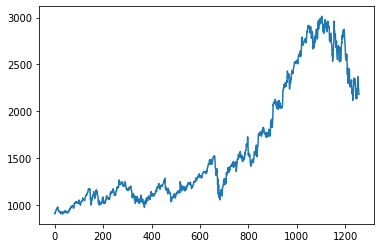

In [ ]:
plt.plot(df_close)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(1258, 1)

In [ ]:
df_close

array([[2.39618129e-03],
       [1.42347404e-05],
       [5.66068175e-03],
       ...,
       [6.35092431e-01],
       [6.07723770e-01],
       [6.04957486e-01]])

In [ ]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
14/14 [==============================] - 22s 485ms/step - loss: 0.0164 - val_loss: 0.1435
Epoch 2/100
14/14 [==============================] - 11s 794ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 3/100
14/14 [==============================] - 9s 636ms/step - loss: 0.0013 - val_loss: 0.0354
Epoch 4/100
14/14 [==============================] - 9s 626ms/step - loss: 0.0010 - val_loss: 0.0065
Epoch 5/100
14/14 [==============================] - 6s 406ms/step - loss: 8.5984e-04 - val_loss: 0.0040
Epoch 6/100
14/14 [==============================] - 9s 618ms/step - loss: 8.2825e-04 - val_loss: 0.0039
Epoch 7/100
14/14 [==============================] - 9s 621ms/step - loss: 8.2466e-04 - val_loss: 0.0042
Epoch 8/100
14/14 [==============================] - 8s 536ms/step - loss: 7.8305e-04 - val_loss: 0.0046
Epoch 9/100
14/14 [==============================] - 6s 413ms/step - loss: 8.1426e-04 - val_loss: 0.0056
Epoch 10/100
14/14 [==============================] - 9s 640ms/step -

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
math.sqrt(mean_squared_error(y_train, train_predict))

1339.4670964275297

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

2678.028806935988

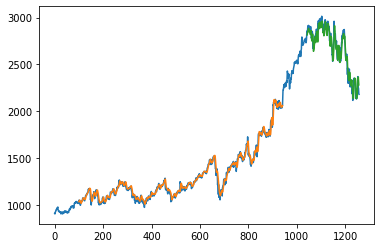

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data), x_test.shape

(315, (214, 100, 1))

In [ ]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 108)

107

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=x_input.shape[1]
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.77254783 0.80025338 0.83849738 0.84713312 0.86802023 0.86495502
 0.90100687 0.88417192 0.9108241  0.91281222 0.91687861 0.92921538
 0.92346929 0.89504726 0.90501632 0.93294014 0.90846113 0.87157417
 0.86482691 0.84153413 0.80154399 0.78804946 0.80618927 0.77740662
 0.78412542 0.80851427 0.78682527 0.75543293 0.70491383 0.73941884
 0.70388893 0.66132231 0.70299214 0.66080986 0.68159733 0.69082618
 0.73301321 0.67770175 0.66739106 0.64294526 0.65718475 0.65126784
 0.64367598 0.6755096  0.65915863 0.67727471 0.63646371 0.6207533
 0.60715913 0.62949343 0.57501708 0.57419621 0.59750797 0.64024066
 0.65200805 0.65293805 0.68718684 0.65699021 0.68020707 0.68228534
 0.682366   0.66034961 0.62722536 0.58403716 0.58705018 0.61738441
 0.58175486 0.5934226  0.63280064 0.63298094 0.63915408 0.69470278
 0.67652502 0.63808173 0.63509243 0.60772377 0.60495749 0.60477066
 0.59681666 0.59349996 0.59233057 0.59284502 0.59472394 0.59766036
 0.60135329 0.60552382 0.60992754 0.61436075 0.6186

In [ ]:
day_new = np.arange(1,101).reshape(20,5)
day_pred = np.arange(101,131).reshape(10,3)
df3 = df_close.tolist()
df3.extend(lst_output)
len(df_close)


1258